# Tagging Sequences and Chunking with NLTK

Kevin Nolasco

Cabrini University

MCIS565 - Natural Language Processing

04/10/2022

# Prompt

Pick one of the three chunk types in the CoNLL corpus. Write functions to do the following tasks for your chosen type:
- List all the tag sequences that occur with each instance of this chunk type.
- Count the frequency of each tag sequence, and produce a ranked list in order of decreasing frequency; each line should consist of an integer (the frequency) and the tag sequence.
- Inspect the high-frequency tag sequences. Use these as the basis for developing a better chunker.

## Load Data

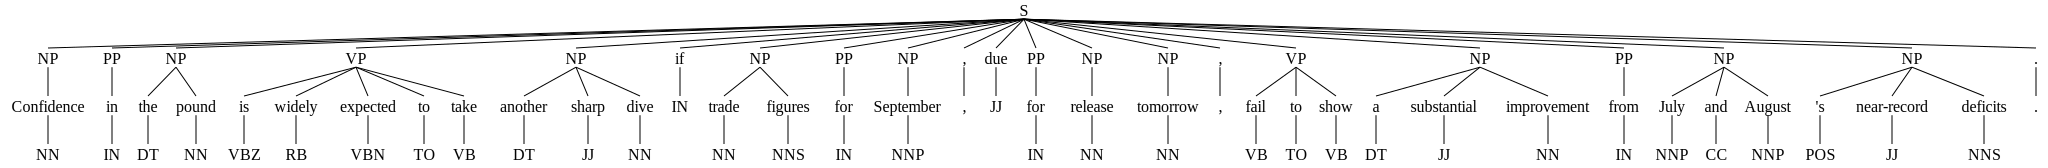

In [161]:
# load CoNLL corpus
from nltk.corpus import conll2000
import nltk
conll2000.chunked_sents('train.txt')[0]

In [162]:
# choose only the NN chunk type
train_chunks = conll2000.chunked_sents('train.txt', chunk_types=['NP'])

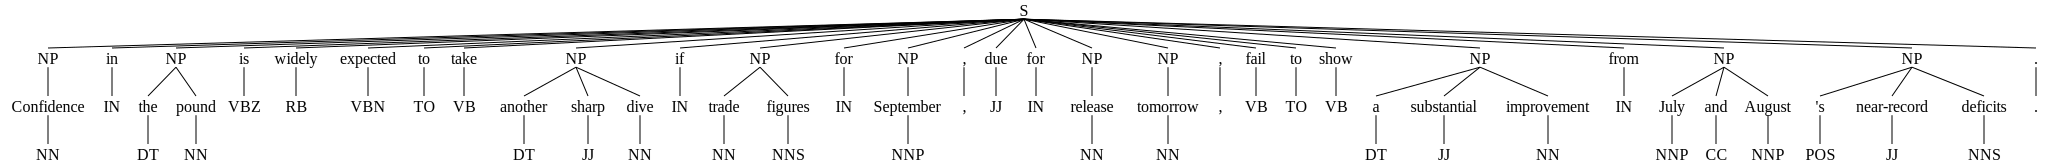

In [163]:
train_chunks[0]

## Prompt 1

List all the tag sequences that occur with each instance of this chunk type.

In [164]:
def list_tag_sequences(train_trees):
    # prepare list of tag sequences
    tag_seqs = []
    # go through each tree in train trees
    for tree in train_trees:
        # keep the chunks that are 'NP' types
        chunked_by_NP = [chunk for chunk in tree if type(chunk) == nltk.tree.Tree]
        # look through each chunk
        for chunk in chunked_by_NP:
            # save the tag for the chunk
            tag_seqs.extend([[tag for (_, tag) in chunk]])
    return tag_seqs

In [165]:
tag_seqs = list_tag_sequences(train_chunks)

In [166]:
# look at the first 20
tag_seqs[:20]

[['NN'],
 ['DT', 'NN'],
 ['DT', 'JJ', 'NN'],
 ['NN', 'NNS'],
 ['NNP'],
 ['NN'],
 ['NN'],
 ['DT', 'JJ', 'NN'],
 ['NNP', 'CC', 'NNP'],
 ['POS', 'JJ', 'NNS'],
 ['DT', 'NNP'],
 ['NNP', 'NNP'],
 ['POS', 'VBN', 'NN'],
 ['DT', 'NN', 'JJ', 'NN'],
 ['DT', 'NN'],
 ['NN'],
 ['DT', 'JJ', 'NN'],
 ['NNS'],
 ['VBG', 'NN'],
 ['NN']]

## Prompt 2
Count the frequency of each tag sequence, and produce a ranked list in order of decreasing frequency; each line should consist of an integer (the frequency) and the tag sequence.

In [167]:
# I want to use nltk.FreqDist()
# this expects an iterable object, so I need to transform the list into a string of tags
def list_to_string(tag_seqs):
    list_of_strings = []
    for seq in tag_seqs:
        list_of_strings.append('-'.join(seq))
    return list_of_strings

str_tag_seqs = list_to_string(tag_seqs)

In [168]:
str_tag_seqs[:20]

['NN',
 'DT-NN',
 'DT-JJ-NN',
 'NN-NNS',
 'NNP',
 'NN',
 'NN',
 'DT-JJ-NN',
 'NNP-CC-NNP',
 'POS-JJ-NNS',
 'DT-NNP',
 'NNP-NNP',
 'POS-VBN-NN',
 'DT-NN-JJ-NN',
 'DT-NN',
 'NN',
 'DT-JJ-NN',
 'NNS',
 'VBG-NN',
 'NN']

To conserve space, we will look at the top 20 most frequent tag sequences.

In [169]:
my_seq_dist = nltk.FreqDist(str_tag_seqs)
my_seq_dist.most_common(20)

[('DT-NN', 7223),
 ('PRP', 3802),
 ('NNS', 3282),
 ('NNP', 3249),
 ('NN', 3245),
 ('NNP-NNP', 2642),
 ('DT-JJ-NN', 2119),
 ('JJ-NNS', 1722),
 ('DT-NNS', 1173),
 ('JJ-NN', 1143),
 ('NN-NNS', 1012),
 ('WDT', 930),
 ('DT-NN-NN', 921),
 ('CD', 866),
 ('CD-NN', 830),
 ('$-CD-CD', 824),
 ('CD-NNS', 690),
 ('NNP-NNP-NNP', 677),
 ('PRP$-NN', 624),
 ('POS-NN', 552)]

Above we can see that the most common tag sequence for NP (noun phrase) is DT NN (optional delimeter followed by a noun of any type.)

## Prompt 3
Inspect the high-frequency tag sequences. Use these as the basis for developing a better chunker.

In [170]:
# gather the test data for evaluation
test_seqs = conll2000.chunked_sents('test.txt', chunk_types=['NP'])

First, we need to convert the string of tag sequences to a regex string.

In [171]:
# extract tag sequences in an ordered list
ordered_list_of_tags = list(tag_seq for tag_seq, _ in sorted(my_seq_dist.items(), key = lambda x: x[1], reverse = True))
ordered_list_of_tags = [tag.split('-') for tag in ordered_list_of_tags]

In [182]:
# use the top 50 sequences to define a regex parser
def list_to_regex_str(tag_seqs, n = 50):
    top_n = tag_seqs[:n]
    tmp_str_list = []
    for tags in top_n:
        tmp_str_list.append('{{{}}}\n'.format(''.join('<{}>'.format(tag) for tag in tags)))
    return ''.join(tmp_str_list)

In [183]:
# save regex pattern for regexpParser
regex_str = list_to_regex_str(ordered_list_of_tags)
regex_str = r'NP: ' + regex_str
regex_str

'NP: {<DT><NN>}\n{<PRP>}\n{<NNS>}\n{<NNP>}\n{<NN>}\n{<NNP><NNP>}\n{<DT><JJ><NN>}\n{<JJ><NNS>}\n{<DT><NNS>}\n{<JJ><NN>}\n{<NN><NNS>}\n{<WDT>}\n{<DT><NN><NN>}\n{<CD>}\n{<CD><NN>}\n{<$><CD><CD>}\n{<CD><NNS>}\n{<NNP><NNP><NNP>}\n{<PRP$><NN>}\n{<POS><NN>}\n{<DT>}\n{<WP>}\n{<DT><NNP>}\n{<NN><NN>}\n{<$><CD>}\n{<DT><NNP><NN>}\n{<PRP$><NNS>}\n{<JJ><NN><NNS>}\n{<DT><NNP><NNP>}\n{<DT><JJ><NN><NN>}\n{<DT><JJ><NNS>}\n{<NNP><NNP><NNP><NNP>}\n{<POS><NNS>}\n{<CD><CD>}\n{<PRP$><JJ><NN>}\n{<EX>}\n{<NNP><CD>}\n{<NNP><NNS>}\n{<DT><JJ><JJ><NN>}\n{<POS><JJ><NN>}\n{<DT><NN><NNS>}\n{<DT><NNP><NNP><NNP>}\n{<JJ><JJ><NN>}\n{<JJ><JJ><NNS>}\n{<DT><VBN><NN>}\n{<DT><CD><NNS>}\n{<IN>}\n{<NNP><NN>}\n{<NNP><CC><NNP>}\n{<POS><NN><NN>}\n'

In [184]:
# create parser and evaluate on train
cp = nltk.RegexpParser(regex_str)
print(cp.accuracy(train_chunks))


ChunkParse score:
    IOB Accuracy:  57.9%%
    Precision:     21.8%%
    Recall:        43.4%%
    F-Measure:     29.0%%
<class 'nltk.chunk.util.ChunkScore'>


Looks like the top 20 tag sequences aren't enough to capture all the NP's. Let's grow the pattern up to from 20 to 200 and see if the results improve.

In [192]:
def grow_tag_size(ordered_list_of_tags):
    accuracies = []
    for n in range(20, 210, 10):
        print('====================================================\n')
        print('Results for number of tag sequences = {}'.format(n))
        regex_str = list_to_regex_str(ordered_list_of_tags, n = n)
        regex_str = r'NP: ' + regex_str

        cp = nltk.RegexpParser(regex_str)
        score = cp.accuracy(train_chunks)
        accuracies.append(score.accuracy())
        print(score)
        print('====================================================\n')
    return accuracies

In [193]:
all_scores = grow_tag_size(ordered_list_of_tags)


Results for number of tag sequences = 20
ChunkParse score:
    IOB Accuracy:  63.6%%
    Precision:     29.4%%
    Recall:        41.0%%
    F-Measure:     34.2%%


Results for number of tag sequences = 30
ChunkParse score:
    IOB Accuracy:  68.1%%
    Precision:     27.2%%
    Recall:        42.8%%
    F-Measure:     33.2%%


Results for number of tag sequences = 40
ChunkParse score:
    IOB Accuracy:  68.1%%
    Precision:     27.3%%
    Recall:        43.1%%
    F-Measure:     33.5%%


Results for number of tag sequences = 50
ChunkParse score:
    IOB Accuracy:  57.9%%
    Precision:     21.8%%
    Recall:        43.4%%
    F-Measure:     29.0%%


Results for number of tag sequences = 60
ChunkParse score:
    IOB Accuracy:  59.8%%
    Precision:     19.3%%
    Recall:        43.7%%
    F-Measure:     26.8%%


Results for number of tag sequences = 70
ChunkParse score:
    IOB Accuracy:  59.8%%
    Precision:     19.3%%
    Recall:        43.7%%
    F-Measure:     26.8%%


Results f

In [195]:
import numpy as np
n_sizes = np.arange(20,210, 10)
max_acc = max(all_scores)
best_size = n_sizes[all_scores.index(max_acc)]
print('The model with the highest accuracy was using {} of the most common tag sequences.'.format(best_size))
print('This model achieved {:.2%} accuracy on the training set.'.format(max_acc))

The model with the highest accuracy was using 40 of the most common tag sequences.
This model achieved 68.14% accuracy on the training set.


Let's see how this model would do on the test set.

In [196]:
# create regex patterns with n = 40
regex_str = list_to_regex_str(ordered_list_of_tags, n = 40)
regex_str = r'NP: ' + regex_str

# build a parser
cp = nltk.RegexpParser(regex_str)
# evaluate on test set
print(cp.accuracy(test_seqs))

ChunkParse score:
    IOB Accuracy:  67.5%%
    Precision:     26.4%%
    Recall:        42.0%%
    F-Measure:     32.5%%


That's pretty good! Let's take the first sentence in the test set and see how it is parsing the chunks.

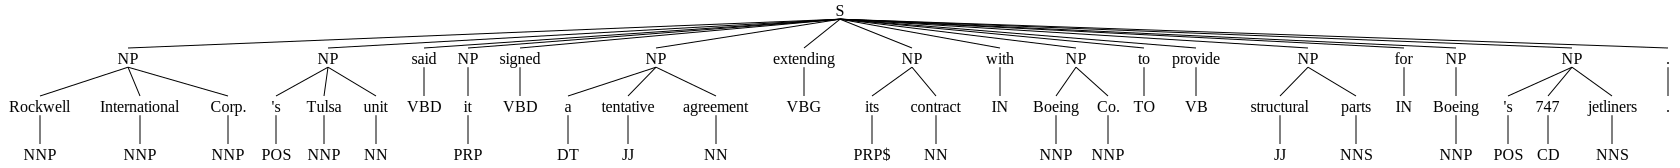

In [205]:
cp.parse(test_seqs[0])

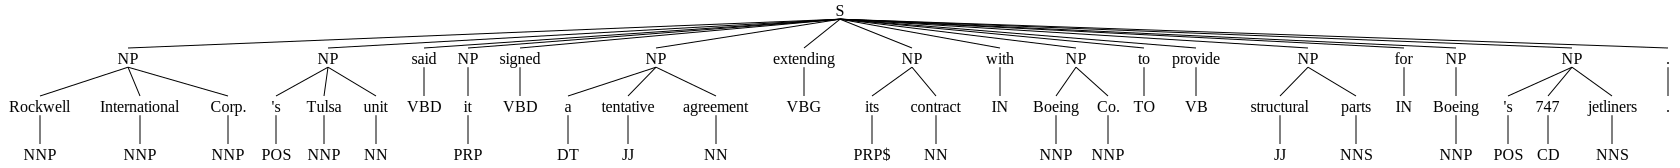

In [206]:
test_seqs[0]

# Conclusion

As we can see above, we were successfully able to build a chunk parser by using the top 40 most frequently used tag sequences from the training set. Although the chunk parser is not 100% accurate, I learned a lot about how powerful these algorithms can be and how simple they are to implement.